# Actor Critic Methods

### Problems with Policy Gradient Methods and need for Actor-Critic Methods

Policy Gradient methods have a major problem. We are in a situation of Monte Carlo, waiting until the end of episode to calculate the reward. We may conclude that if we have a high reward $R(t)$, all actions that we took were good, even if some of them were really bad.

$\text{good}\qquad\text{good}\qquad\quad\text{bad}\qquad\qquad\qquad\quad\text{good}$

$A_1\quad\to\quad A_2\quad\to\quad A_3\quad\to\quad\cdots\quad\to\quad A_n$


As we can see in this example, even if $A_3$ was a bad action (led to negative rewards), all the actions will be averaged as good because the total reward was important.

As a consequence, to have an optimal policy, we need a lot of samples. This produces slow learning, because it takes a lot of time to converge.

What if, instead, we can do an update at each time step?

The Actor Critic model is a better score function. Instead of waiting until the end of the episode as we do in **Monte Carlo REINFORCE**, we make an update at each step (**TD Learning**).

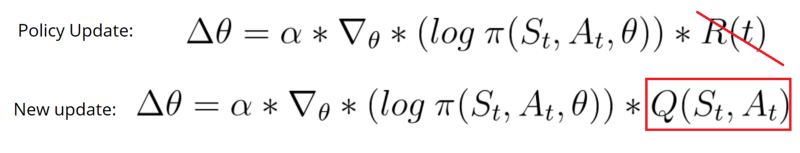

Because we do an update at each time step, we can't use the total rewards $R(t)$. Instead, we need to train a Critic model that approximates the value function (note that the value function calculates what is the _maximum expected future reward_ given a state and an action). This value function replaces the reward function in policy gradient that calculates the rewards only at the end of the episode.

#### Introducing the Advantage function to stabilize learning

As with the improvements in Deep Q Learning, **value-based methods have high variability**.

To reduce this problem, the **advantage function** instead of the **value function** is used.

The advantage function is defined as $A(s,a) = Q(s,a) - V(s)$

This function will tell us the **improvement compared to the average action taken at any state**. In other words, this function calculates the extra reward we get if we take this action. The extra reward is what is beyond the expected value of that state.

If $A(s,a) > 0$: the gradient is pushed in that direction.

If $A(s,a) < 0$: the action $a$ does worse than the average value of that state and the gradient is pushed in the opposite direction.

The problem of implementing this advantage function is that is requires two value functions — $Q(s,a)$ and $V(s)$. 

However, we can use the TD error as a good estimator of the advantage function.

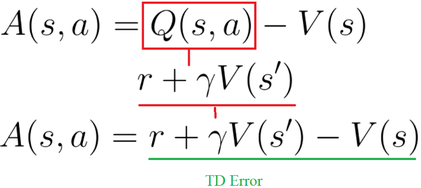

**The insight of using advantage estimates rather than just discounted returns is to allow the agent to determine not just how good its actions were, but how much better they turned out to be than expected.** Intuitively, this allows the algorithm to focus on where the network's predictions were lacking.

The full article can be found [here](https://www.freecodecamp.org/news/an-intro-to-advantage-actor-critic-methods-lets-play-sonic-the-hedgehog-86d6240171d/).

In [1]:
from IPython.lib.display import YouTubeVideo

### Motivation

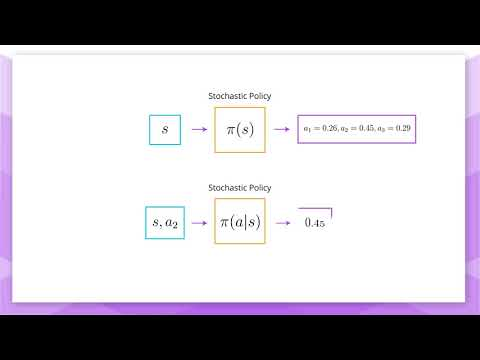

In [2]:
YouTubeVideo('dpFPlDtdxyQ')

### Bias and Variance

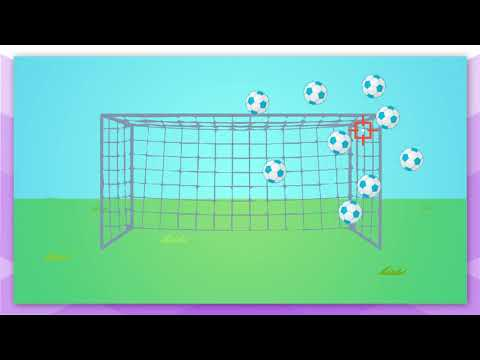

In [3]:
YouTubeVideo('_vnkkwm46uU')

### Two Ways For Estimating Expected Returns: Bias-Variance Tradeoff in RL

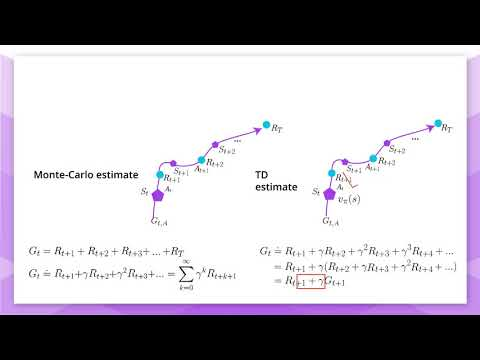

In [4]:
YouTubeVideo('2W6yIBDvfsQ')

### Not all Baselines are Critics

In [ ]:
YouTubeVideo('wqmqoiUuQHI')

**Baselines computed using Monte-Carlo estimates are NOT critics (even if we use function approximators to estimate these baselines)**. However, in the literature, people do sometimes call them critics. The argument they often make as to why to call a neural network trained with Monte-Carlo estimates a `Critic` is because function approximators, such as a neural network, are biased as a byproduct that they are not perfect. That's a fair point, though, we prefer the distinction based on whether we pick a **Monte-Carlo** or a **TD estimate** to train our function approximator. *Now, definitely we should not be calling Actor-Critic methods every method that uses 2 neural networks*.

Nevertheless, there are inconsistencies out there. We often see methods named `Actor-Critic` when they are not.

For example, according to Sutton's RL book (page 333)

> Although the **REINFORCE-with-baseline** method learns both a policy and a state-value function, we do not consider it to be an actor–critic method because its state-value function is used only as a baseline, not as a critic. That is, it is not used for bootstrapping (updating the value estimate for a state from the estimated values of subsequent states), but only as a baseline for the state whose estimate is being updated.

### Policy-based, Value-based and Actor-Critic

In [ ]:
YouTubeVideo('iyin896PNEc')

### A Basic Actor-Critic Agent

In [ ]:
YouTubeVideo('KdHQ24hBKho')

In the previous video $V(s;\theta_v)\text{ or }V_\pi(s;\theta_v)$ and $A(s,a)\text{ or }A_\pi(s,a)$ are the evaluations of the value and advantage functions respectively w.r.t. to a given policy $\pi$.

The other thing to note is the use of $\theta_v$ in some value (or advantage) functions and not in others. This only means that such value function is using a neural network parameterized by $\theta_v$. For example, $V(s;\theta_v)$ is using a neural network as a function approximator, but $A(s,a)$ is not. We are calculating the advantage function $A(s,a)$ using the state-value function $V(s;\theta_v)$, but $A(s,a)$ is not using function approximation directly.

In actor-critic the critic (value function) gets updated based on the difference of the immediate reward $R_1$ and what the critic expected: $V(S_2) - V(S_1)$, and then the actor (policy) only looks at the critic while learning. The reward used in the policy gradient to update the actor is $V(S_2) - V(S_1)$, it doesn't see specific $R_i$ values. This value difference is often much less noisy than $R_1$, it might also be a bit wrong.

### A3C: Asynchronous Advantage Actor-Critic

#### N-step Bootstrapping

In [ ]:
YouTubeVideo('twNXFplIAP8')

Bootstrapping or Temporal Difference roughly means that we estimate the value of the action as a sum of our immediate reward plus an approximation (using a value function) of future rewards we expect from our next state. So if we play a game $S_1,A_1,R_1,S_2,A_2,\cdots$ then our first action gets reward $R_1 + V(S_2)$ and not $R_1+R_2+R_3+\cdots$

#### Parallel Training

In [ ]:
YouTubeVideo('kKRbAKhjACo')

#### Off-policy vs. On-policy

In [ ]:
YouTubeVideo('AZiy5R0DESU')

[Link](https://arxiv.org/abs/1611.02247) to the Q-Prop paper.

### A2C: Advantage Actor-Critic

In [ ]:
YouTubeVideo('fIWe3xA97DA')

### GAE: Generalized Advantage Estimation

In [ ]:
YouTubeVideo('oLFocWp0dt0')

[Link](https://arxiv.org/abs/1506.02438) to the GAE paper.

## Learning to play Boxing using Advantage Actor Critic (A2C)

We will implement and train a policy to play [atari-boxing](https://www.endtoend.ai/envs/gym/atari/#variants), using only the pixels as input. We will use convolutional neural nets and multiprocessing to implement and train our policy.

Watch the [A2C video](https://www.youtube.com/watch?v=LiUBJje2N0c) for a detailed code walk-through.

### Import the Necessary Packages

In [ ]:
import time
import copy
import os.path
import numpy as np
import random as rand
from collections import deque, namedtuple

import gym
gym.logger.set_level(40)                              # suppress warnings (please remove if gives error)

from utils.ParallelEnvironments import ParallelEnv 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from IPython.display import display as Display
from IPython.display import HTML
from pyvirtualdisplay import Display as display
display = display(visible=0, size=(1400, 900))
display.start()
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

`BoxingDeterministic` does not contain random frameskip, so it's faster to train than the vanilla `Boxing-v4` environment. More on the different variants of atari enviroments can be found [here](https://www.endtoend.ai/envs/gym/atari/#variants).

In [ ]:
ENVIRONMENT = 'BoxingDeterministic-v4'
NOOP        = 0
FIRE        = 1
UP          = 2
RIGHT       = 3
LEFT        = 4
DOWN        = 5
UPRIGHT     = 6
UPLEFT      = 7
DOWNRIGHT   = 8
DOWNLEFT    = 9
ACTIONS     = [NOOP, FIRE, UP, RIGHT, LEFT, DOWN, UPRIGHT, UPLEFT, DOWNRIGHT, DOWNLEFT]

A2C_MODEL_FILE = './models/a2c-boxing.pt'

In [ ]:
RANDOM_SEED = 12345

In [ ]:
env = gym.make(ENVIRONMENT)

env.seed(RANDOM_SEED)
rand.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

print('List of available actions: ', env.unwrapped.get_action_meanings())

We will only use these actions:
```
NOOP        = 0
FIRE        = 1
UP          = 2
RIGHT       = 3
LEFT        = 4
DOWN        = 5
UPRIGHT     = 6
UPLEFT      = 7
DOWNRIGHT   = 8
DOWNLEFT    = 9
```

### Preprocessing

To speed up training, we can simplify the input by cropping the images and use every other pixel

In [ ]:
def preprocess_single(image, bkg_color = np.array([110, 156, 66])):
    '''
    preprocess a single frame (210x160x3)
    crop image and downsample to 74x74
    stack two frames together as input
    '''
    image = np.mean(image[32:-30:2,6:-6:2] - bkg_color, axis=-1) / 255.0
    return image

def preprocess_batch(images, bkg_color = np.array([110, 156, 66])):
    '''
    convert outputs of parallelEnv to inputs of pytorch neural net
    this is useful for batch processing especially on the GPU
    '''
    list_of_images = np.asarray(images)
    if len(list_of_images.shape) < 5:
        list_of_images = np.expand_dims(list_of_images, 1)
    # subtract background and crop
    list_of_images_prepro = np.mean(list_of_images[:,:,32:-30:2,6:-6:2] - bkg_color, axis=-1) / 255.0
    batch_input = np.swapaxes(list_of_images_prepro, 0, 1)
    # torch.Size([N, len(images), 74, 74]) i.e. (#data_points, #frames, 74, 74)
    return torch.from_numpy(batch_input).float().to(device)

#### This is what a preprocessed image looks like

In [ ]:
env.reset()
env.step(0)
for _ in range(20): # get a frame after 20 steps
    frame, _, _, _ = env.step(1)

plt.subplot(1,2,1)
plt.imshow(frame)
plt.title('original image')

plt.subplot(1,2,2)
plt.title('preprocessed image')

# 74x74 black and white image
plt.imshow(preprocess_single(frame), cmap='Greys')
plt.show()

### Policy
 
Now, we define our **`Actor Critic`** network. The input is the stack of four different frames (which captures the movement), and the output is a number $\Pr(a|s)$ i.e. the probability of choosing one of the $10$ actions.

In [ ]:
class ActorCriticNetwork(nn.Module):
    '''
    set up an actor critic network
    
    Params
    ======
        input: Nx4x74x74 shaped vector i.e. N data/input, 4 frames/channels, each image is 74x74
        outout: Nx10 shaped vector representing the probabilities of chosing one of the 10 actions
                Nx1  shaped vector representing the value function estimate of the input state
    '''
    def __init__(self):
        super(ActorCriticNetwork, self).__init__()
        # in_channel = number of channels in the input image
        # out_channel = number of channels in the output feature map = number of filters
        # outputsize = (inputsize - kernel_size + stride) / stride  (round up if not an integer)
        # 4x74x74 to 8x35x35
        self.conv1 = nn.Conv2d(4, 8, kernel_size=6, stride=2, bias=False)
        # 8x35x35 to 16x11x11
        self.conv2 = nn.Conv2d(8, 16, kernel_size=5, stride=3)
        self.fc = nn.Linear(16*11*11, 512)

        self.actor = nn.Linear(512, 10) # 10 actions
        self.critic = nn.Linear(512, 1) # 1 value function estimate

    def forward(self, x):
        # shape of x is Nx4x74x74 i.e. N data/input, 4 frames/channels, each image is 74x74
        x = x.to(device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1) # flatten the tensor
        x = F.relu(self.fc(x))

        logits = self.actor(x)
        v = self.critic(x)

        ####### choice 1 (pytorch native) #######
        distribution = torch.distributions.Categorical(logits=logits)
        action = distribution.sample()
        log_prob = distribution.log_prob(action).unsqueeze(-1)
        entropy = distribution.entropy().unsqueeze(-1)
        #########################################
        
        ###### choice 2 (custom equivalent) #####
#         logits = logits - torch.log(torch.exp(logits).sum())
#         distribution = F.softmax(logits, dim=-1)
#         samples = torch.rand(distribution.shape[0], requires_grad=False).unsqueeze(-1).cpu()
#         cdf = torch.cumsum(distribution.detach(), dim=1).cpu()
#         action = torch.argmax(cdf >= samples, dim=1).to(device)
#         log_prob = torch.log(distribution.gather(1, action.unsqueeze(-1)))
#         entropy = - (distribution * torch.log(distribution)).sum(dim=1).unsqueeze(-1)
        ########################################
        
        return {
            'action': action,
            'log_pi_a': log_prob.double(),
            'entropy': entropy.double(),
            'v': v.double()
        }

#### Drawing Samples from a Distribution

In [ ]:
YouTubeVideo('nNK4xKkAapM', start=1135)

### Game visualization

Here we define a function that plays a game and shows learning progress.

In [ ]:
def animate_frames(frames):
    'function to animate a list of frames'
    
    def display_animation(anim):
        plt.close(anim._fig)
        return HTML(anim.to_jshtml())

    plt.axis('off')
    cmap = None if len(frames[0].shape) == 3 else 'Greys' # color option for plotting, use Greys for greyscale
    patch = plt.imshow(frames[0], cmap=cmap)  
    fanim = animation.FuncAnimation(plt.gcf(), lambda x: patch.set_data(frames[x]), frames = len(frames), interval=30)
    Display(display_animation(fanim))


def play(env, policy, time=2000, preprocess=None, nrand=5):
    '''
    play a game and display the animation
    
    Params
    ======
        nrand (int): number of random steps before using the policy
        preprocess (func): add the argument preprocess_single to see what the agent sees
    '''
    env.reset()
    env.step(0) # start game
    
    # perform nrand random steps in the beginning
    for _ in range(nrand):
        frame1, _, _, _ = env.step(np.random.choice(ACTIONS))
        frame2, _, _, _ = env.step(0)
        frame3, _, _, _ = env.step(np.random.choice(ACTIONS))
        frame4, _, _, _ = env.step(0)
    
    anim_frames = []
    
    for i in range(time):
        frame_input = preprocess_batch([frame1, frame2, frame3, frame4])
        prediction = policy(frame_input)

        action = prediction['action'].item()
        frame1, _, is_done, _ = env.step(action)
        frame2, _, is_done, _ = env.step(0)
        frame3, _, is_done, _ = env.step(action)
        frame4, _, is_done, _ = env.step(0)
        frames = [frame1, frame2, frame3, frame4]
        
        anim_frames.extend(list(map(preprocess, frames)) if preprocess else frames)
        
        if is_done:
            break
    animate_frames(anim_frames)

The `white` agent is supposed to be controlled by the RL algorithm and the `black` agent is controlled by the environment.

In [ ]:
policy = ActorCriticNetwork().to(device)

play(env, policy, time=400) # add the argument "preprocess=preprocess_single" to see what the agent sees

### Rolled Out Experience Replay Buffer

During training, we need to collect samples. To make things efficient we use parallelized environments to collect multiple trajectories at once.

In [ ]:
class Storage:
    def __init__(self, memory_size, keys=None):
        if keys is None: keys = []
        keys = keys + ['state', 'action', 'reward', 'mask', 'v', 'q', 'q_a', 'pi', 'ret',
                       'entropy', 'advantage', 'log_pi', 'log_pi_a', 'mean', 'next_state']
        self.keys = keys
        self.memory_size = memory_size
        self.reset()

    def feed(self, data):
        for k, v in data.items():
            if k not in self.keys:
                raise RuntimeError('Undefined key')
            getattr(self, k).append(v)

    def placeholder(self):
        for k in self.keys:
            v = getattr(self, k)
            if len(v) == 0:
                setattr(self, k, [None] * self.memory_size)

    def reset(self):
        for key in self.keys:
            setattr(self, key, [])
        self.pos = 0
        self._size = 0

    def extract(self, keys):
        data = [getattr(self, k)[:self.memory_size] for k in keys]
        data = map(lambda x: torch.cat(x, dim=0), data)
        Entry = namedtuple('Entry', keys)
        return Entry(*list(data))

### Actor-Critic Objective Function for Training

```
N (number of parallel agents) = 4
T (rollout length)  = 5
```

We have two choices:
  1. $\nabla_\theta U(\theta)=\frac{1}{N}{\displaystyle\sum^N_{i=1}}{\displaystyle\sum^T_{t=1}} A\left(s_t^{(i)},a_t^{(i)}\right)\cdot\nabla_\theta\log\left(\pi_\theta\left(a^{(i)}_t|s^{(i)}_t\right)\right)\quad+\quad\frac{1}{N}{\displaystyle\sum^N_{i=1}}\frac{1}{T}{\displaystyle\sum^T_{t=1}}\mathcal{E}_t^{(i)}\quad-\quad\frac{1}{N}{\displaystyle\sum^N_{i=1}}\frac{1}{T}{\displaystyle\sum^T_{t=1}}\frac{1}{2}\left[A\left(s_t^{(i)}, a_t^{(i)}\right)\right]^2$
  2. $\nabla_\theta U(\theta)=\frac{1}{N}{\displaystyle\sum^N_{i=1}}\frac{1}{T}{\displaystyle\sum^T_{t=1}} A\left(s_t^{(i)}, a_t^{(i)}\right)\cdot\nabla_\theta\log\left(\pi_\theta\left(a^{(i)}_t|s^{(i)}_t\right)\right)\quad+\quad\frac{1}{N}{\displaystyle\sum^N_{i=1}}\frac{1}{T}{\displaystyle\sum^T_{t=1}}\mathcal{E}_t^{(i)}\quad-\quad\frac{1}{N}{\displaystyle\sum^N_{i=1}}\frac{1}{T}{\displaystyle\sum^T_{t=1}}\frac{1}{2}\left[A\left(s_t^{(i)}, a_t^{(i)}\right)\right]^2$

Advantage function *estimate*, $\quad A\left(s_t^{(i)}, a_t^{(i)}\right)={\displaystyle\sum^{T-t}_{j=0}}\gamma^j r_{t+j}^{(i)}+\gamma^{T-t+1}V_{\theta_v}\left(s_{T+1}\right)-V_{\theta_v}\left(s_t\right)\quad$ where $V_{\theta_v}$ is the value function *estimate*.

Entropy, $\quad\mathcal{E}_t^{(i)}=-{\displaystyle\sum_{a\in\mathcal{A}}}\pi_\theta\left(a|s^{(i)}_t\right)\cdot\log\left(\pi_\theta\left(a|s^{(i)}_t\right)\right)$

In equation 2, usually it's useful to divide by the rollout length since the rollout length of each trajectory is fixed and this division will keep the gradient estimate small lest we may overshoot the local maximum. Equation 2 was used by the original author.

$\theta_{new}\leftarrow\theta_{old}+\alpha\cdot\nabla_\theta U(\theta)$

### Training

We are now ready to train our policy!

### Hyperparameters for Training

In [ ]:
USE_GAE           = False
LAMBDA            = 1.0
GAMMA             = 0.99
LEARNING_RATE     = 1e-4
ENTROPY_WEIGHT    = 0.01
VALUE_LOSS_WEIGHT = 1.0
N_WORKERS         = 4
ROLLOUT_LENGTH    = 5
GRADIENT_CLIP     = 5
MAX_STEPS         = 250000

In [ ]:
class SignNormalizer():
    'To normalize the rewards'
    def __call__(self, x):
        return np.sign(x)

class A2CAgent():
    def __init__(self, n_step_skip=5, log_interval=50, save_interval=100, eval_interval=5):
        '''
        params
        ======
            n_step_skip(int)  : skip this many random steps
            log_interval(int) : log progress after every this many steps
            save_interval(int): save the model after every this many steps
            eval_interval(int): evaluate the model after every this many steps
        '''
        self.use_gae = USE_GAE
        self.λ = LAMBDA
        
        self.γ = GAMMA
        self.entropy_weight = ENTROPY_WEIGHT
        self.value_loss_weight = VALUE_LOSS_WEIGHT
        
        self.n_workers = N_WORKERS
        self.rollout_length = ROLLOUT_LENGTH
        self.gradient_clip = GRADIENT_CLIP
        self.max_steps = MAX_STEPS

        self.envs = ParallelEnv(ENVIRONMENT, self.n_workers, seed=RANDOM_SEED)
        self.network = ActorCriticNetwork().to(device)
        self.optimizer = torch.optim.RMSprop(self.network.parameters(), lr=LEARNING_RATE, alpha=0.99, eps=1e-5)
        
        self.total_steps = 0
        self.log_interval = log_interval
        self.save_interval = save_interval
        self.eval_interval = eval_interval
        
        if os.path.isfile(A2C_MODEL_FILE):
            # load training checkpoints from file
            map_location = (lambda storage, loc: storage.cuda()) if torch.cuda.is_available() else 'cpu'
            checkpoint = torch.load(A2C_MODEL_FILE, map_location=map_location)
            self.network.load_state_dict(checkpoint['model_state_dict'])
            self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            self.start_step = checkpoint['start_step']
            self.eval_reward = checkpoint['eval_reward']
        else:
            # start training from scratch
            self.start_step = 0
            self.eval_reward = np.array([])

        self.network.train()
        self.envs.reset()

        # skip 'n_step_skip' random steps
        for _ in range(n_step_skip):
            frames1, rewards1, _, _ = self.envs.step(np.random.choice(ACTIONS, self.n_workers))
            frames2, rewards2, _, _ = self.envs.step(np.random.choice(ACTIONS, self.n_workers))
            frames3, rewards3, _, _ = self.envs.step(np.random.choice(ACTIONS, self.n_workers))
            frames4, rewards4, _, _ = self.envs.step(np.random.choice(ACTIONS, self.n_workers))

        # preprocess_batch properly converts four frames from all workers into shape (N, 4, 74, 74),
        # the proper input for the policy that is required when building CNN with pytorch
        # N = self.n_workers
        self.states = preprocess_batch([frames1, frames2, frames3, frames4])
        
    def step(self):
        storage = Storage(self.rollout_length)
        states = self.states
        for _ in range(self.rollout_length):
            prediction = self.network(states)
            frames1, rewards1, terminals1, _ = self.envs.step([NOOP] * self.n_workers)
            frames2, rewards2, terminals2, _ = self.envs.step(prediction['action'].cpu().detach().numpy())
            frames3, rewards3, terminals3, _ = self.envs.step([NOOP] * self.n_workers)
            frames4, rewards4, terminals4, _ = self.envs.step(prediction['action'].cpu().detach().numpy())
            states = preprocess_batch([frames1, frames2, frames3, frames4])   

            rewards = rewards1 + rewards2 + rewards3 + rewards4
            # rewards = SignNormalizer(rewards)

            terminals = np.stack([terminals1, terminals2, terminals3, terminals4], axis=1).any(axis=1)
            for index, is_done in enumerate(terminals):
                if is_done:
                    self.envs.reset_individual(index)

            storage.feed(prediction)
            storage.feed({
                'reward': torch.tensor(rewards).to(device).unsqueeze(-1),
                'mask': torch.tensor(1 - terminals, dtype=torch.double).to(device).unsqueeze(-1)
            })

        self.total_steps += 1
        self.states = states
        prediction = self.network(states)
        storage.feed(prediction)
        storage.placeholder()

        advantages = torch.tensor(np.zeros((self.n_workers, 1)))
        returns = prediction['v'].detach()
        for i in reversed(range(self.rollout_length)):    
            returns = storage.reward[i] + self.γ * storage.mask[i] * returns
            if not self.use_gae:
                advantages = returns - storage.v[i].detach()
            else:
                td_error = storage.reward[i] + self.γ * storage.mask[i] * storage.v[i + 1] - storage.v[i]
                advantages = advantages * self.λ * self.discount * storage.mask[i] + td_error
            storage.advantage[i] = advantages.detach()
            storage.ret[i] = returns.detach()

        entries = storage.extract(['log_pi_a', 'v', 'ret', 'advantage', 'entropy'])

        # actor objective function        
        policy_gradient_equation_1 = (entries.log_pi_a.view(-1, self.n_workers) * entries.advantage.view(-1, self.n_workers)).sum(dim=0).mean()
        policy_gradient_equation_2 = (entries.log_pi_a * entries.advantage).mean()
        policy_gradient = policy_gradient_equation_2

        # critic loss
        value_gradient = 0.5 * (entries.ret - entries.v).pow(2).mean()

        entropy_regularization = entries.entropy.mean()

        self.optimizer.zero_grad()
        loss = - policy_gradient - self.entropy_weight * entropy_regularization + self.value_loss_weight * value_gradient
        loss.backward()
        nn.utils.clip_grad_norm_(self.network.parameters(), self.gradient_clip)
        self.optimizer.step()

        # evaluate the model
        if self.total_steps % self.eval_interval == 0:
            self.eval_reward = np.append(self.eval_reward, self.eval_episode())

        # display progress
        print('\r' + ' ' * 120, end='')
        print('\rIteration: {}/{}    Avg. Episodic Score: {:.4f}    Recent Episodic Scores: {}'.format(
            self.start_step + self.total_steps,
            self.start_step + self.max_steps,
            self.eval_reward[-100:].mean() if len(self.eval_reward[-100:]) else 0.0,
            self.eval_reward[-5:]
        ), end='')
        if self.total_steps % self.log_interval == 0:
            print('\r' + ' ' * 120, end='')
            print('\rIteration: {}/{}    Avg. Episodic Score: {:.4f}'.format(
                self.start_step + self.total_steps,
                self.start_step + self.max_steps,
                self.eval_reward[-100:].mean()
            ))   

        # save the model
        if self.total_steps % self.save_interval == 0:
            torch.save({
                'start_step': self.start_step + self.total_steps,
                'model_state_dict': self.network.state_dict(),
                'optimizer_state_dict': self.optimizer.state_dict(),
                'eval_reward': self.eval_reward
            }, A2C_MODEL_FILE)

    def close(self):
        self.envs.close()
        
    def eval_episode(self):
        env = gym.make(ENVIRONMENT)
        env.reset()
        frame1, reward1, _, _ = env.step(np.random.choice(ACTIONS))
        frame2, reward2, _, _ = env.step(np.random.choice(ACTIONS))
        frame3, reward3, _, _ = env.step(np.random.choice(ACTIONS))
        frame4, reward4, _, _ = env.step(np.random.choice(ACTIONS))        
        state = preprocess_batch([frame1, frame2, frame3, frame4])
        reward = 0
        while True:
            prediction = self.network(state)
            frame1, reward1, terminal1, _ = env.step(NOOP)
            frame2, reward2, terminal2, _ = env.step(prediction['action'].item())
            frame3, reward3, terminal3, _ = env.step(NOOP)
            frame4, reward4, terminal4, _ = env.step(prediction['action'].item())
            state = preprocess_batch([frame1, frame2, frame3, frame4])
            reward += reward1 + reward2 + reward3 + reward4
            if terminal1 or terminal2 or terminal3 or terminal4:
                break
        env.close()
        return reward

#### Training Loop

In [ ]:
agent = A2CAgent()

while agent.total_steps < agent.max_steps:
    try:
        agent.step()
    except KeyboardInterrupt:
        print('\nTraining Interrupted')
        break
agent.close()

### Plot Episodic Scores over Time

In [ ]:
plt.plot(agent.eval_reward);

### Play Game after Training

In [ ]:
LOAD_MODEL_FILE = A2C_MODEL_FILE

In [ ]:
env = gym.make(ENVIRONMENT)
env.seed(int(time.time()))
policy = ActorCriticNetwork().to(device)

# load the weights from file
map_location = (lambda storage, loc: storage.cuda()) if torch.cuda.is_available() else 'cpu'
policy.load_state_dict(torch.load(LOAD_MODEL_FILE, map_location=map_location)['model_state_dict'])

policy.eval()

play(env, policy)

env.close()

| Pytorch Sampling    |  Custom Sampling    |
|:------------------: | :-----------------: |
|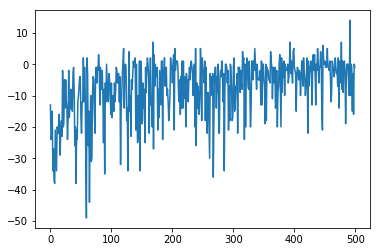 | 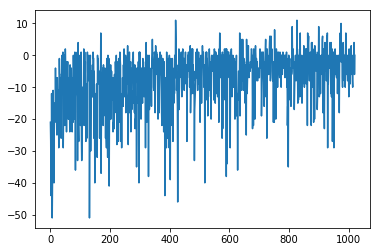 |

## DDPG: Deep Deterministic Policy Gradient

### Continuous Action Space

In [ ]:
YouTubeVideo('0NVOPIyrr98')

In the [DDPG paper](https://arxiv.org/abs/1509.02971), they introduced this algorithm as an `Actor-Critic` method. But, some researchers think DDPG is best classified as a DQN method for continuous action spaces (along with [NAF](https://arxiv.org/abs/1603.00748)).

#### Soft Updates

In [ ]:
YouTubeVideo('RT-HDnAVe9o')

In [ ]:
YouTubeVideo('rRuiMhijw_s', start=70)

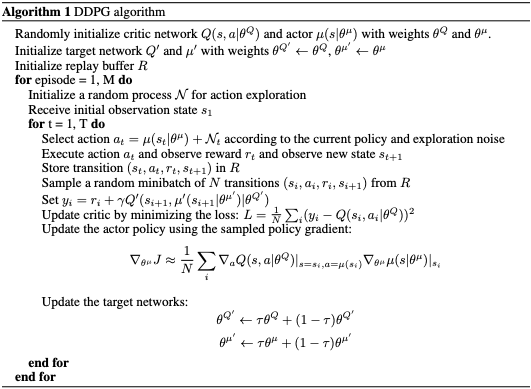

## Application of Deep Deterministic Policy Gradients (DDPG)

We'll implement a DDPG agent with OpenAI Gym's [BipedalWalker](https://gym.openai.com/envs/BipedalWalker-v2/) and [Pendulum](https://gym.openai.com/envs/Pendulum-v0/) environment.

Watch the [DDPG video](https://www.youtube.com/watch?v=08V9r3NgFSE) for a detailed code walk-through.

### Instantiate the Environment

In [ ]:
ENVIRONMENT = 'Pendulum-v0'
ENVIRONMENT = 'BipedalWalker-v3'

DDPG_MODEL_FILE = './models/ddpg.pt'

RANDOM_SEED = 4

In [ ]:
env = gym.make(ENVIRONMENT)

ACTION_SIZE = env.action_space.shape[0]
STATE_SIZE  = env.observation_space.shape[0]

env.close()

torch.manual_seed(RANDOM_SEED)
rand.seed(RANDOM_SEED)
env.seed(RANDOM_SEED)

print('State Space: ', env.observation_space)
print('Action Space: ', env.action_space)

### The Actor-Critic Network

If training is too slow, increasing the **Learning Rate** by a factor of 2-3 and/or adding **BatchNorm/LayerNorm** layers often helps.

```python
class Model(nn.Module):
    def __init__(self, input_units, output_units, hidden_units=128):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)
        self.bn = nn.BatchNorm1d(hidden_units)
        # self.ln = nn.LayerNorm(hidden_units)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn(x)
        # x = self.ln(x)
        return F.tanh(self.fc2(x))
```

In [ ]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1.0 / np.sqrt(fan_in)
    return -lim, lim


class Actor(nn.Module):
    '''Actor (Policy) Model'''

    def __init__(self, state_size, action_size, fc1_units=128, fc2_units=256):
        '''Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        '''
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.ln1 = nn.LayerNorm(fc1_units)
        self.ln2 = nn.LayerNorm(fc2_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        '''Build an actor (policy) network that maps states -> actions'''
        x = F.relu(self.fc1(state))
        x = self.ln1(x)
        x = F.relu(self.fc2(x))
        x = self.ln2(x)
        return torch.tanh(self.fc3(x))


class Critic(nn.Module):
    '''Critic (Value) Model'''

    def __init__(self, state_size, action_size, fc1_units=128, fc2_units=256):
        '''Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            fc1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
            fc3_units (int): Number of nodes in the third hidden layer
        '''
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units + action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.ln1 = nn.LayerNorm(fc1_units)
        self.ln2 = nn.LayerNorm(fc2_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        '''Build a critic (value) network that maps (state, action) pairs -> Q-values'''
        x = F.leaky_relu(self.fc1(state))
        x = self.ln1(x)
        x = torch.cat((x, action), dim=1)
        x = F.leaky_relu(self.fc2(x))
        x = self.ln2(x)
        return self.fc3(x)

### Exploration: Adding Random Noise to the Continuous Actions

In [ ]:
class OUNoise:
    '''Ornstein-Uhlenbeck process'''
    
    def __init__(self, size, mu=0.0, theta=0.15, sigma=0.1):
        '''Initialize parameters and noise process'''
        self.state = None
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()

    def reset(self):
        '''Reset the internal state (= noise) to mean (mu)'''
        self.state = copy.copy(self.mu)

    def sample(self):
        '''Update internal state and return it as a noise sample'''
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([rand.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

### Experience Replay Buffer

In [ ]:
class ReplayBuffer:
    '''Fixed-size buffer to store experience tuples'''        

    def __init__(self, action_size, buffer_size, batch_size):
        '''Initialize a ReplayBuffer object.
        Params
        ======
            action_size (int): number of actions
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        '''        
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple('Experience', field_names=['state', 'action', 'reward', 'next_state', 'done'])

    def add(self, state, action, reward, next_state, done):
        '''Add a new experience to memory'''
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        '''Randomly sample a batch of experiences from memory'''
        experiences = rand.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        '''Return the current size of internal memory'''
        return len(self.memory)

### Hyperparameters for Training

In [ ]:
BUFFER_SIZE  = int(1e6)      # replay buffer size
BATCH_SIZE   = 128           # minibatch size
GAMMA        = 0.99          # discount factor
TAU          = 3e-3          # for soft update of target parameters

LR_ACTOR     = 1e-3          # learning rate of the actor 
LR_CRITIC    = 2 * LR_ACTOR  # learning rate of the critic [1, 10] times of LR_ACTOR
WEIGHT_DECAY = 0.0001        # L2 weight decay [0, 0.0001]

NOISE_MU     = 0.0
NOISE_THETA  = 0.15
NOISE_SIGMA  = 0.1

TARGET_SCORE = 100

### The DDPG Agent

The `learn` method in the `Agent` class does the actual learning. It uses sampled batch of experience tuples.

Sometimes learning becomes unstable i.e. accuracy/score might suddenly drop after some short and steady progress. Clipping the gradient values might help in retaining stability of learning.

```python
optimizer.zero_grad()
loss.backward()
torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
optimizer.step()
```

In [ ]:
class AgentDDPG():
    '''Interacts with and learns from the environment'''        

    def __init__(self, state_size, action_size):
        '''Initialize an Agent object
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
        '''
        
        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size).to(device)
        self.actor_target = Actor(state_size, action_size).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size).to(device)
        self.critic_target = Critic(state_size, action_size).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(action_size, mu=NOISE_MU, theta=NOISE_THETA, sigma=NOISE_SIGMA)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE)
        
        self.hard_update(self.actor_target, self.actor_local)
        self.hard_update(self.critic_target, self.critic_local)
            
    def step(self, state, action, reward, next_state, done):
        '''Save experience in replay memory, and use random sample from buffer to learn'''
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > self.memory.batch_size:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        '''Returns actions for given state as per current policy'''
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)
        # ----- if action value needs to be between [0,1] ----- #
        # return np.clip((action + 1.0) / 2.0, 0, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        '''Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        '''
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # get predicted next-state actions and Q values from target models
        with torch.no_grad():
            target_next_actions = self.actor_target(next_states)
            target_next_Q_values = self.critic_target(next_states, target_next_actions)
        
            # compute Q targets for current states (y_i)
            td_target = rewards + (gamma * target_next_Q_values * (1 - dones))
        
        # compute Q values for the current states and actions
        Q_expected = self.critic_local(states, actions)
        
        # compute critic loss
        critic_loss = F.mse_loss(Q_expected, td_target.detach())

        # minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        
        # optional gradient clipping sometimes helps in stable learning
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #   
        actions = self.actor_local(states)
        
        # Compute actor loss
        actor_loss = - self.critic_local(states, actions).mean()
        
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.actor_target, self.actor_local, TAU)
        self.soft_update(self.critic_target, self.critic_local, TAU)
    
    def hard_update(self, target_model, source_model):
        for target_param, source_param in zip(target_model.parameters(), source_model.parameters()):
            target_param.data.copy_(source_param.data)

    def soft_update(self, target_model, source_model, tau):
        '''Soft update model parameters
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            target_model: PyTorch model (weights will be copied to)
            source_model: PyTorch model (weights will be copied from)
            tau (float): interpolation parameter 
        '''
        for target_param, source_param in zip(target_model.parameters(), source_model.parameters()):
            target_param.data.copy_(target_param.data * (1.0 - tau) + source_param.data * tau)

### Watch an Untrained Agent in Action

In [ ]:
env = gym.make(ENVIRONMENT)
agent = AgentDDPG(state_size=STATE_SIZE, action_size=ACTION_SIZE)

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for t in range(200):
    action = agent.act(state, add_noise=False)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break

env.close()

### Train the Agent with DDPG

In [ ]:
def train(n_episodes=1000, planning_horizon=300, print_every=50, save_every=100):
    agent = AgentDDPG(state_size=STATE_SIZE, action_size=ACTION_SIZE)
    start_episode = 0
    scores = []
    solved = False 
    if os.path.isfile(DDPG_MODEL_FILE):
        # load training checkpoints from file
        map_location = (lambda storage, loc: storage.cuda()) if torch.cuda.is_available() else 'cpu'
        checkpoint = torch.load(DDPG_MODEL_FILE, map_location=map_location)
        agent.actor_local.load_state_dict(checkpoint['actor_local'])
        agent.actor_target.load_state_dict(checkpoint['actor_target'])
        agent.actor_optimizer.load_state_dict(checkpoint['actor_optimizer'])
        agent.critic_local.load_state_dict(checkpoint['critic_local'])
        agent.critic_target.load_state_dict(checkpoint['critic_target'])
        agent.critic_optimizer.load_state_dict(checkpoint['critic_optimizer'])
        start_episode = checkpoint['episode']
        scores = checkpoint['scores']
        solved = checkpoint['solved']
    if solved:
        return scores    
    agent.actor_local.train()
    agent.critic_local.train()
    env = gym.make(ENVIRONMENT)
    scores_deque = deque(maxlen=100)
    try:
        for e in range(start_episode, start_episode + n_episodes):
            state = env.reset()
            agent.reset()
            score = 0
            for t in range(planning_horizon):
                action = agent.act(state)
                next_state, reward, done, _ = env.step(action)
                agent.step(state, action, reward, next_state, done)
                state = next_state
                score += reward
                if done:
                    break 
            scores_deque.append(score)
            scores.append(score)

            # display progress after every iteration        
            print('\r' + ' ' * 120, end='')
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(e + 1, np.mean(scores_deque), score), end='')
            if (e + 1) % print_every == 0:
                print('\r' + ' ' * 120, end='')
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(e + 1, np.mean(scores_deque)))
            if (
                (e == start_episode + n_episodes - 1) or
                ((e + 1) % save_every == 0) or
                np.mean(scores_deque) >= TARGET_SCORE
            ):
                torch.save({
                    'episode': e + 1,
                    'scores': scores,
                    'solved': True if np.mean(scores_deque) >= TARGET_SCORE else False,
                    'actor_local': agent.actor_local.state_dict(),
                    'actor_target': agent.actor_target.state_dict(),
                    'actor_optimizer': agent.actor_optimizer.state_dict(),
                    'critic_local': agent.critic_local.state_dict(),
                    'critic_target': agent.critic_target.state_dict(),
                    'critic_optimizer': agent.critic_optimizer.state_dict()    
                }, DDPG_MODEL_FILE)
                if np.mean(scores_deque) >= TARGET_SCORE:
                    print('\nEnvironment solved in {:04d} episodes!\tAverage Score: {:.4f}'.format(e + 1, np.mean(scores_deque)))
                    break
    except KeyboardInterrupt:
        print('\nTraining Interrupted')
        env.close()
        return scores
    env.close()
    return scores

Run the code cell below to train the agent from scratch. Try different values of the parameters in the function, to try to get better performance!

```
Pendulum-v0      : train()
BipedalWalker-v3 : train(n_episodes=4000, planning_horizon=1000)
```

In [ ]:
scores = train(n_episodes=4000, planning_horizon=1000)

### Plot the Scores

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Watch a Smart Agent in Action

In [ ]:
env = gym.make(ENVIRONMENT)
agent = AgentDDPG(state_size=STATE_SIZE, action_size=ACTION_SIZE)

# load the weights from file
map_location = (lambda storage, loc: storage.cuda()) if torch.cuda.is_available() else 'cpu'
checkpoint = torch.load(DDPG_MODEL_FILE, map_location=map_location)
agent.actor_local.load_state_dict(checkpoint['actor_local'])
agent.actor_local.eval()

# simulate the smart agent            
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
while True:
    action = agent.act(state, add_noise=False)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### Notes

- Nudging the various hyperparameters and network architecture may help us solving the environments faster.
- We may try **prioritized experience replay**, to see if that speeds up learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has been [shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.

---

Next: [Multi Agent Reinforcement Learning](./Multi%20Agent%20RL.ipynb)